# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [1]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)
from scipy.stats import norm
from scipy.stats import t

### Load the dataset

Load the cleaned dataset.

In [2]:
#your code here
wnba = pd.read_csv("C:/Users/haenni/Documents/GitHub/M2-mini-project2/data/wnba_clean.csv", index_col=0)
wnba.head()


,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

In [3]:
# your answer here
## it has to be normal distributed ---> we checked before in the eda with a potplot, it seemed to be normally distributed
## it has to have more than 30 observations
wnba.shape[0]

## other way: share of women bellow my sisters weight: 
print(wnba[wnba['Weight']<=67].shape[0]/ wnba.shape[0])    
##
print(wnba[wnba['Weight']<=70].shape[0]/ wnba.shape[0])
###--> there are women in the wnba, that have a lower or almost the same weight as my sister, namely almost 20%

## or hypothes-testing: If the mean is significantly different: 
ttest_1samp(wnba.Weight, 67)
### the average weight of the women in the wnba is significantly different from my sisters weight

0.19014084507042253
0.23943661971830985


Ttest_1sampResult(statistic=12.981385575989544, pvalue=7.635325397241363e-26)

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

78.97887323943662
(77.17027122332428, 80.78747525554897)
(77.15461406720749, 80.80313241166576)


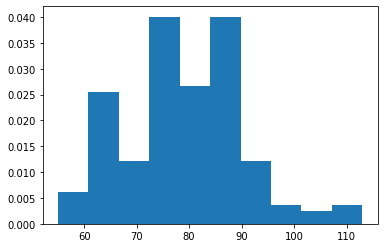

In [4]:
# your code here

mu = wnba.Weight.mean()
print(mu)
se= wnba.Weight.std() / math.sqrt(wnba.Weight.shape[0])

print(norm.interval(0.95, loc=mu, scale=se))
print(t.interval(0.95, df=wnba.shape[0]-1, loc=mu, scale=se))

plt.hist(wnba.Weight, density = True, bins=10);

**What can you say about these results?**

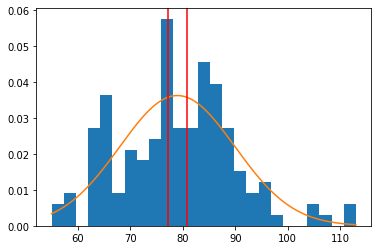

In [5]:
#your-answer-here
### i am surprised that the confidence-intervall is so small, 
### because according to the statistics 20% of the players have a weight less then 67 kg
## eventhough 67 kg is not in the conficence-intervall
# this leads me to the question, if to assume that weight is normal distributed is correct?
import numpy as np

plt.hist(wnba.Weight, density = True, bins=25);

normal = norm(wnba.Weight.mean(), wnba.Weight.std())
x = np.linspace(wnba.Weight.min(),wnba.Weight.max(),1000)
y = normal.pdf(x)
plt.plot(x,y)

plt.axvline(norm.interval(0.95, loc=mu, scale=se)[0], color='red')
plt.axvline(norm.interval(0.95, loc=mu, scale=se)[1], color='red')
plt.show()

## yes, it seems to be a good approach. So maybee ithe sample size 

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

In [6]:
#your-answer-here
### based on the confidence-interval, my sister has no chance of beeing a good bascetball player
## based on the sample-size, she has...
## --> my addvice: try if you want 

## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

In [7]:
# your code here

## see above

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

(3.4206839128122466, 0.0006246388523836955)


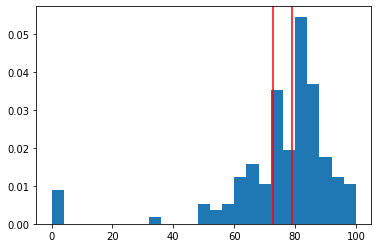

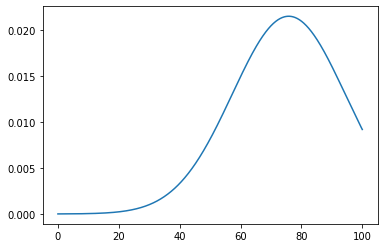

In [8]:
# your answer here
## i would do like that: 

# estimate the percentage of players that fail more than 40% of their free throws using 
wnba[wnba['FT%']>40].shape[0]/wnba.shape[0]

### --> 96 %

## use z_proportion test to test if the percentage is above 90%

from statsmodels.stats.proportion import proportions_ztest

print(proportions_ztest(wnba[wnba['FT%']>40].shape[0],wnba.shape[0], 0.90))

## the p-value claims that the percentage is not 90%, so probably higher with more then 5% "certainty"

## requirements: normal distributetd and sample size bigger than 30

wnba['FT%'].describe()
wnba[wnba['FT%']>40].shape[0]
#sample size is bigger than 30

plt.hist(wnba['FT%'], density = True, bins=25);
mu=wnba['FT%'].mean()
se=wnba['FT%'].std()/ math.sqrt(wnba.shape[0])
normal = norm(wnba['FT%'].mean(), wnba['FT%'].std())
x = np.linspace(wnba['FT%'].min(),wnba['FT%'].max(),1000)
y = normal.pdf(x)
plt.axvline(norm.interval(0.95, loc=mu, scale=se)[0], color='red')
plt.axvline(norm.interval(0.95, loc=mu, scale=se)[1], color='red')
plt.show()
plt.plot(x,y)
#the sample is more right-shaped, than normal distributed

## I am not sure, i think it is not a good idea to do this test, because it is not normal distributed,
## and i can not think abaout an assumption that might help us to make this test more reliable


**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [9]:
# your code here

### see above

**What can you comment about our result? What would you tell your sister?**

In [10]:
#your-answer-here

## it is very likely that more than 90% of players miss more than 40% of their free throw

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

In [11]:
#your code here

### see above

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [15]:
#your-answer-here
### i would do a t-test against 52
t_stat, pval=ttest_1samp(wnba['AST'], 52)

### requirements: normal distributed: unfortunately it is not (as we saw in the EDA). 
### Thats why it would be a good idea to calculate the AST per minute for women
## and compare then with the AST per minute for both women and male
# unfortunately we dont know the AST per minute for both women and male.
### n > 30: ok
pval


0.033261541354107166

**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [15]:
#your code here
### see above

In [18]:
#your-answer-here

#Python stats.ttest_1samp is for two-tailed test. 
### p value is 0.033
## it is bellow 5%. so we can reject the 0 hypothesis that the average number of assists for WNBA players is only higher than the average for WNBA and NBA players together.
## but the risk of Type 1 error is "big", because the p-value is close to alpha

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [16]:
#your-answer-here

#Make sure to half the p-value and check the sign of t-statistic for one-tailed test.
pval/2 ## or we dont have to think about it....
t_stat
## check t-stats: its negative --> the mean of the wnbm is smaller than 52, and not bigger


-2.1499947192482898

# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

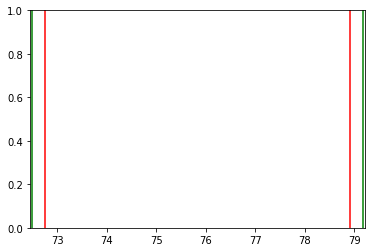

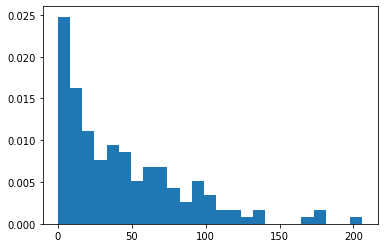

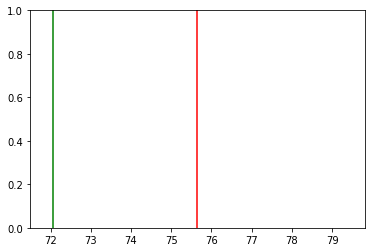

In [25]:
#your code here
from scipy.stats import t


### plot two sided test
# red for confidence-interval
plt.axvline(t.interval(0.95, df=wnba.shape[0]-1,loc=mu, scale=se)[0], color='red')
plt.axvline(t.interval(0.95, df=wnba.shape[0]-1,loc=mu, scale=se)[1], color='red')
# green for t-stats
plt.axvline(t.interval((1-pval), df=wnba.shape[0]-1,loc=mu, scale=se)[0], color='green')
plt.axvline(t.interval((1-pval), df=wnba.shape[0]-1,loc=mu, scale=se)[1], color='green')
plt.show()



### plot one sided test  
plt.hist(wnba['AST'], density = True, bins=25)
plt.show()
# red for confidence-interval
plt.axvline(t.interval(0.09, df=wnba.shape[0]-1, loc=mu, scale=se)[0], color='red')
# green for t-stats
plt.axvline(t.interval((1-pval/2), df=wnba.shape[0]-1,loc=mu, scale=se)[0], color='green')

#! Here i am still not sure, if i understood it correct, so i am currrious about your feedback. Thank you!


plt.show()


# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [22]:
#your-answer-here

In [19]:
# your code here

**What are your comments in regards to the results of the test?**

In [24]:
#your-answer-here